In [2]:
import xarray as xr
import pandas as pd
import numpy as np

In [3]:
variables_list = [
            '100m_u_component_of_wind', '100m_v_component_of_wind', '10m_u_component_of_neutral_wind',
            '10m_u_component_of_wind', '10m_v_component_of_neutral_wind', '10m_v_component_of_wind',
            '10m_wind_speed', '2m_dewpoint_temperature', '2m_temperature',
            'air_density_over_the_oceans', 'angle_of_sub_gridscale_orography', 'anisotropy_of_sub_gridscale_orography',
            'benjamin_feir_index', 'boundary_layer_dissipation', 'boundary_layer_height',
            'charnock', 'clear_sky_direct_solar_radiation_at_surface', 'cloud_base_height',
            'coefficient_of_drag_with_waves', 'convective_available_potential_energy', 'convective_inhibition',
            'convective_precipitation', 'convective_rain_rate', 'convective_snowfall',
            'convective_snowfall_rate_water_equivalent', 'downward_uv_radiation_at_the_surface', 'duct_base_height',
            'eastward_gravity_wave_surface_stress', 'eastward_turbulent_surface_stress', 'evaporation',
            'forecast_albedo', 'forecast_logarithm_of_surface_roughness_for_heat', 'forecast_surface_roughness',
            'free_convective_velocity_over_the_oceans', 'friction_velocity', 'gravity_wave_dissipation',
            'high_cloud_cover', 'high_vegetation_cover', 'ice_temperature_layer_1',
            'ice_temperature_layer_2', 'ice_temperature_layer_3', 'ice_temperature_layer_4',
            'instantaneous_10m_wind_gust', 'instantaneous_eastward_turbulent_surface_stress', 'instantaneous_large_scale_surface_precipitation_fraction',
            'instantaneous_moisture_flux', 'instantaneous_northward_turbulent_surface_stress', 'instantaneous_surface_sensible_heat_flux',
            'k_index', 'lake_bottom_temperature', 'lake_cover',
            'lake_depth', 'lake_ice_depth', 'lake_ice_temperature',
            'lake_mix_layer_depth', 'lake_mix_layer_temperature', 'lake_shape_factor',
            'lake_total_layer_temperature', 'land_sea_mask', 'large_scale_precipitation',
            'large_scale_precipitation_fraction', 'large_scale_rain_rate', 'large_scale_snowfall',
            'large_scale_snowfall_rate_water_equivalent', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
            'low_cloud_cover', 'low_vegetation_cover', 
            'magnitude_of_turbulent_surface_stress',
            'maximum_individual_wave_height', 'mean_boundary_layer_dissipation', 'mean_convective_precipitation_rate',
            'mean_convective_snowfall_rate', 'mean_direction_of_total_swell', 'mean_direction_of_wind_waves',
            'mean_eastward_gravity_wave_surface_stress', 'mean_eastward_turbulent_surface_stress', 'mean_evaporation_rate',
            'mean_gravity_wave_dissipation', 'mean_large_scale_precipitation_fraction', 'mean_large_scale_precipitation_rate',
            'mean_large_scale_snowfall_rate', 'mean_magnitude_of_turbulent_surface_stress', 'mean_northward_gravity_wave_surface_stress',
            'mean_northward_turbulent_surface_stress', 'mean_period_of_total_swell', 'mean_period_of_wind_waves',
            'mean_potential_evaporation_rate', 'mean_runoff_rate', 'mean_sea_level_pressure',
            'mean_snow_evaporation_rate', 'mean_snowfall_rate', 'mean_snowmelt_rate',
            'mean_square_slope_of_waves', 'mean_sub_surface_runoff_rate', 'mean_surface_direct_short_wave_radiation_flux',
            'mean_surface_direct_short_wave_radiation_flux_clear_sky', 'mean_surface_downward_long_wave_radiation_flux', 'mean_surface_downward_long_wave_radiation_flux_clear_sky',
            'mean_surface_downward_short_wave_radiation_flux', 'mean_surface_downward_short_wave_radiation_flux_clear_sky', 'mean_surface_downward_uv_radiation_flux',
            'mean_surface_latent_heat_flux', 'mean_surface_net_long_wave_radiation_flux', 'mean_surface_net_long_wave_radiation_flux_clear_sky',
            'mean_surface_net_short_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux_clear_sky', 'mean_surface_runoff_rate',
            'mean_surface_sensible_heat_flux', 'mean_top_downward_short_wave_radiation_flux', 'mean_top_net_long_wave_radiation_flux',
            'mean_top_net_long_wave_radiation_flux_clear_sky', 'mean_top_net_short_wave_radiation_flux', 'mean_top_net_short_wave_radiation_flux_clear_sky',
            'mean_total_precipitation_rate', 'mean_vertical_gradient_of_refractivity_inside_trapping_layer', 'mean_vertically_integrated_moisture_divergence',
            'mean_wave_direction', 'mean_wave_direction_of_first_swell_partition', 'mean_wave_direction_of_second_swell_partition',
            'mean_wave_direction_of_third_swell_partition', 'mean_wave_period', 'mean_wave_period_based_on_first_moment',
            'mean_wave_period_based_on_first_moment_for_swell', 'mean_wave_period_based_on_first_moment_for_wind_waves', 'mean_wave_period_based_on_second_moment_for_swell',
            'mean_wave_period_based_on_second_moment_for_wind_waves', 'mean_wave_period_of_first_swell_partition', 'mean_wave_period_of_second_swell_partition',
            'mean_wave_period_of_third_swell_partition', 'mean_zero_crossing_wave_period', 'medium_cloud_cover',
            'minimum_vertical_gradient_of_refractivity_inside_trapping_layer', 'model_bathymetry', 'near_ir_albedo_for_diffuse_radiation',
            'near_ir_albedo_for_direct_radiation', 'normalized_energy_flux_into_ocean', 'normalized_energy_flux_into_waves',
            'normalized_stress_into_ocean', 'northward_gravity_wave_surface_stress', 'northward_turbulent_surface_stress',
            'ocean_surface_stress_equivalent_10m_neutral_wind_direction', 'ocean_surface_stress_equivalent_10m_neutral_wind_speed', 'orography',
            'peak_wave_period', 'period_corresponding_to_maximum_individual_wave_height', 'potential_evaporation',
            'precipitation_type', 'runoff', 'sea_ice_cover',
            'sea_surface_temperature', 'significant_height_of_combined_wind_waves_and_swell', 'significant_height_of_total_swell',
            'significant_height_of_wind_waves', 'significant_wave_height_of_first_swell_partition', 'significant_wave_height_of_second_swell_partition',
            'significant_wave_height_of_third_swell_partition', 'skin_reservoir_content', 'skin_temperature',
            'slope_of_sub_gridscale_orography', 'snow_albedo', 'snow_density',
            'snow_depth', 'snow_evaporation', 'snowfall',
            'snowmelt', 'soil_temperature_level_1', 'soil_temperature_level_2',
            'soil_temperature_level_3', 'soil_temperature_level_4', 'soil_type',
            'standard_deviation_of_filtered_subgrid_orography', 'standard_deviation_of_orography', 'sub_surface_runoff',
            'surface_latent_heat_flux', 'surface_net_solar_radiation', 'surface_net_solar_radiation_clear_sky',
            'surface_net_thermal_radiation', 'surface_net_thermal_radiation_clear_sky', 'surface_pressure',
            'surface_runoff', 'surface_sensible_heat_flux', 'surface_solar_radiation_downward_clear_sky',
            'surface_solar_radiation_downwards', 'surface_thermal_radiation_downward_clear_sky', 'surface_thermal_radiation_downwards',
            'temperature_of_snow_layer', 'toa_incident_solar_radiation', 'top_net_solar_radiation',
            'top_net_solar_radiation_clear_sky', 'top_net_thermal_radiation', 'top_net_thermal_radiation_clear_sky',
            'total_cloud_cover', 'total_column_cloud_ice_water', 'total_column_cloud_liquid_water',
            'total_column_ozone', 'total_column_rain_water', 'total_column_snow_water',
            'total_column_supercooled_liquid_water', 'total_column_water', 'total_column_water_vapour',
            'total_precipitation', 'total_sky_direct_solar_radiation_at_surface', 'total_totals_index',
            'trapping_layer_base_height', 'trapping_layer_top_height', 'type_of_high_vegetation',
            'type_of_low_vegetation', 
            'u_component_stokes_drift', 'uv_visible_albedo_for_diffuse_radiation',
            'uv_visible_albedo_for_direct_radiation', 'v_component_stokes_drift', 'vertical_integral_of_divergence_of_cloud_frozen_water_flux',
            'vertical_integral_of_divergence_of_cloud_liquid_water_flux', 'vertical_integral_of_divergence_of_geopotential_flux', 'vertical_integral_of_divergence_of_kinetic_energy_flux',
            'vertical_integral_of_divergence_of_mass_flux', 'vertical_integral_of_divergence_of_moisture_flux', 'vertical_integral_of_divergence_of_ozone_flux',
            'vertical_integral_of_divergence_of_thermal_energy_flux', 'vertical_integral_of_divergence_of_total_energy_flux', 'vertical_integral_of_eastward_cloud_frozen_water_flux',
            'vertical_integral_of_eastward_cloud_liquid_water_flux', 'vertical_integral_of_eastward_geopotential_flux', 'vertical_integral_of_eastward_heat_flux',
            'vertical_integral_of_eastward_kinetic_energy_flux', 'vertical_integral_of_eastward_mass_flux', 'vertical_integral_of_eastward_ozone_flux',
            'vertical_integral_of_eastward_total_energy_flux', 'vertical_integral_of_eastward_water_vapour_flux', 'vertical_integral_of_energy_conversion',
            'vertical_integral_of_kinetic_energy', 'vertical_integral_of_mass_of_atmosphere', 'vertical_integral_of_mass_tendency',
            'vertical_integral_of_northward_cloud_frozen_water_flux', 'vertical_integral_of_northward_cloud_liquid_water_flux', 'vertical_integral_of_northward_geopotential_flux',
            'vertical_integral_of_northward_heat_flux', 'vertical_integral_of_northward_kinetic_energy_flux', 'vertical_integral_of_northward_mass_flux',
            'vertical_integral_of_northward_ozone_flux', 'vertical_integral_of_northward_total_energy_flux', 'vertical_integral_of_northward_water_vapour_flux',
            'vertical_integral_of_potential_and_internal_energy', 'vertical_integral_of_potential_internal_and_latent_energy', 'vertical_integral_of_temperature',
            'vertical_integral_of_thermal_energy', 'vertical_integral_of_total_energy', 'vertically_integrated_moisture_divergence',
            'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3',
            'volumetric_soil_water_layer_4', 'wave_spectral_directional_width', 'wave_spectral_directional_width_for_swell',
            'wave_spectral_directional_width_for_wind_waves', 'wave_spectral_kurtosis', 'wave_spectral_peakedness',
            'wave_spectral_skewness', 'zero_degree_level',
        ]

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

plt.rcParams.update({'font.size': 15})

# GET CLIMATE DATA

In [7]:
def get_var(var):
    #var = variables_list[index]
    print(f"retrieving {var}")
    ds_grib = xr.open_dataset('../ClimateReanalysis/ERA5_reanalysis_monthly/ERA5_reanalysis_monthly_'+var+'.grib', engine="cfgrib")
    cariaco_grib = ds_grib.sel(latitude=10.5, longitude=-64.66, method="nearest")
    return cariaco_grib.to_dataframe()

In [25]:
winddat = get_var(variables_list[1])
var = winddat.iloc[:,-1]

winddat2 = get_var(variables_list[2])
var2 = winddat2.iloc[:,-1]

retrieving 100m_v_component_of_wind
retrieving 10m_u_component_of_neutral_wind


In [29]:
wind_data = pd.concat([get_var(var).iloc[:,-1] for var in variables_list], axis='columns')

retrieving 100m_u_component_of_wind
retrieving 100m_v_component_of_wind
retrieving 10m_u_component_of_neutral_wind
retrieving 10m_u_component_of_wind
retrieving 10m_v_component_of_neutral_wind
retrieving 10m_v_component_of_wind
retrieving 10m_wind_speed
retrieving 2m_dewpoint_temperature
retrieving 2m_temperature
retrieving air_density_over_the_oceans
retrieving angle_of_sub_gridscale_orography
retrieving anisotropy_of_sub_gridscale_orography
retrieving benjamin_feir_index
retrieving boundary_layer_dissipation
retrieving boundary_layer_height
retrieving charnock
retrieving clear_sky_direct_solar_radiation_at_surface
retrieving cloud_base_height
retrieving coefficient_of_drag_with_waves
retrieving convective_available_potential_energy
retrieving convective_inhibition
retrieving convective_precipitation
retrieving convective_rain_rate
retrieving convective_snowfall
retrieving convective_snowfall_rate_water_equivalent
retrieving downward_uv_radiation_at_the_surface
retrieving duct_base_he

In [30]:
wind_data.to_csv("ERA5_reanalyisis_monthly.csv")

In [59]:
m100_v_comp_wind = get_var('100m_v_component_of_wind')
m10_v_comp_of_wind = get_var('10m_v_component_of_wind')
m10_wind_speed = get_var('10m_wind_speed')
benjamin_feir_index = get_var('benjamin_feir_index')
coefficient_of_drag_with_waves = get_var('coefficient_of_drag_with_waves')

evaporation = get_var('evaporation')
instantaneous_surface_sensible_heat_flux = get_var('instantaneous_surface_sensible_heat_flux')
magnitude_of_turbulent_surface_stress = get_var('magnitude_of_turbulent_surface_stress')
normalized_energy_flux_into_ocean = get_var('normalized_energy_flux_into_ocean')
sea_surface_temperature = get_var('sea_surface_temperature')
surface_latent_heat_flux = get_var('surface_latent_heat_flux')
u_component_stokes_drift = get_var('u_component_stokes_drift')
v_component_stokes_drift = get_var('v_component_stokes_drift')
friction_velocity = get_var('friction_velocity')

large_scale_precipitation = get_var('large_scale_precipitation')

retrieving 100m_v_component_of_wind
retrieving 10m_v_component_of_wind
retrieving 10m_wind_speed
retrieving benjamin_feir_index
retrieving coefficient_of_drag_with_waves
retrieving evaporation
retrieving instantaneous_surface_sensible_heat_flux
retrieving magnitude_of_turbulent_surface_stress
retrieving normalized_energy_flux_into_ocean
retrieving sea_surface_temperature
retrieving surface_latent_heat_flux
retrieving u_component_stokes_drift
retrieving v_component_stokes_drift
retrieving friction_velocity
retrieving large_scale_precipitation


In [85]:
m10_wind_speed.si10

<xarray.DataArray 'si10' (time: 498)>
array([6.876636, 8.661912, 7.384764, ..., 7.455098, 7.39333 , 6.192157],
      dtype=float32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-06-01
    step        timedelta64[ns] 00:00:00
    surface     int64 0
    latitude    float64 10.57
    longitude   float64 -64.55
    valid_time  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-06-01
Attributes:
    GRIB_paramId:                             207
    GRIB_shortName:                           10si
    GRIB_units:                               m s**-1
    GRIB_name:                                10 metre wind speed
    GRIB_cfVarName:                           si10
    GRIB_dataType:                            an
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      84
    GRIB_totalNumber:                         0
    GRIB_typeOfLevel:                         surface
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_Nx:                                  12
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  -66.55
    GRIB_longitudeOfLastGridPointInDegrees:   -63.8
    GRIB_Ny:                                  7
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   11.32
    GRIB_latitudeOfLastGridPointInDegrees:    9.82
    long_name:                                10 metre wind speed
    units:                                    m s**-1

Text(0.5, 1.0, '10m wind speed - seasonal')

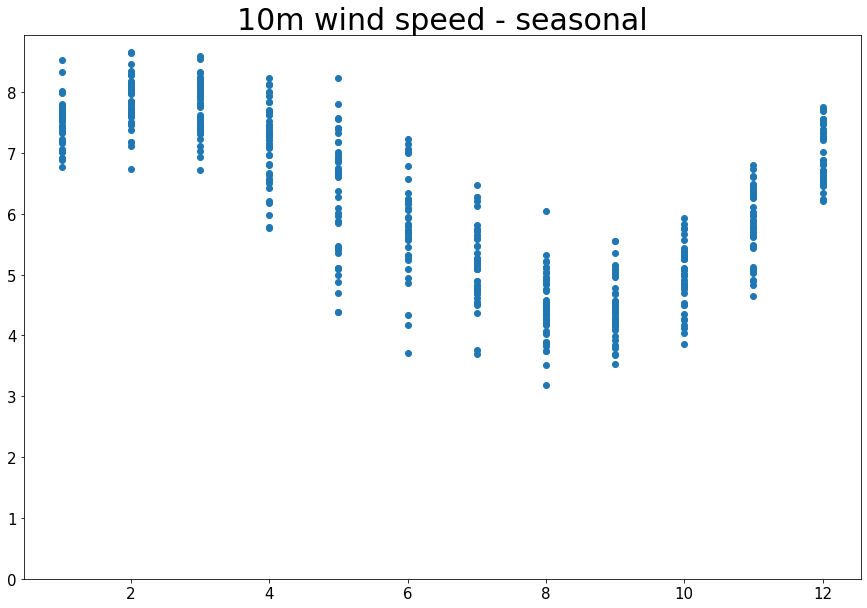

In [199]:
plt.scatter(m10_wind_speed.time.dt.month, m10_wind_speed.si10)
plt.ylim(bottom=0)
plt.title('10m wind speed - seasonal', fontsize=30)

Text(0.5, 1.0, '100m v component of wind  - seasonal')

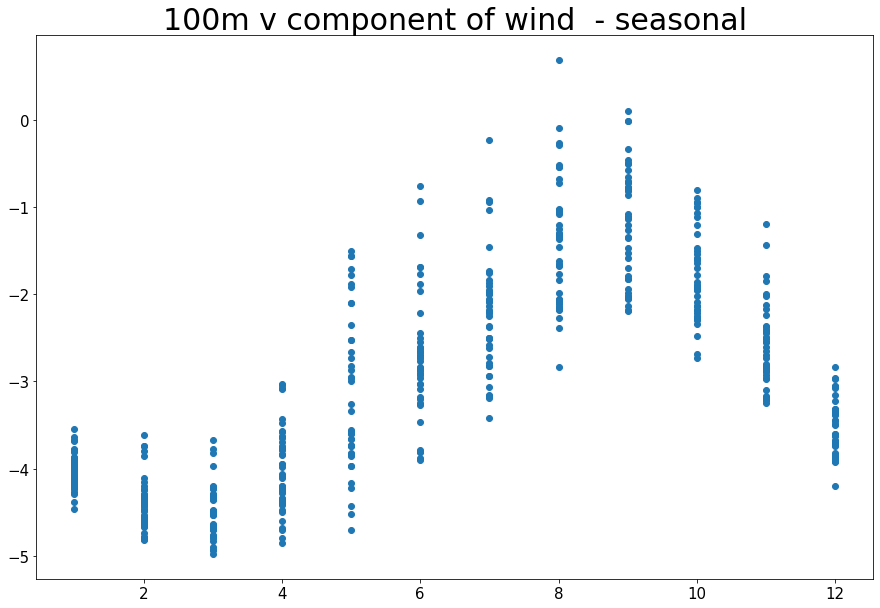

In [200]:
plt.scatter(m100_v_comp_wind.time.dt.month, m100_v_comp_wind.v100)
#plt.ylim(bottom=0)
plt.title('100m v component of wind  - seasonal', fontsize=30)

Text(0.5, 1.0, '10m v component of wind  - seasonal')

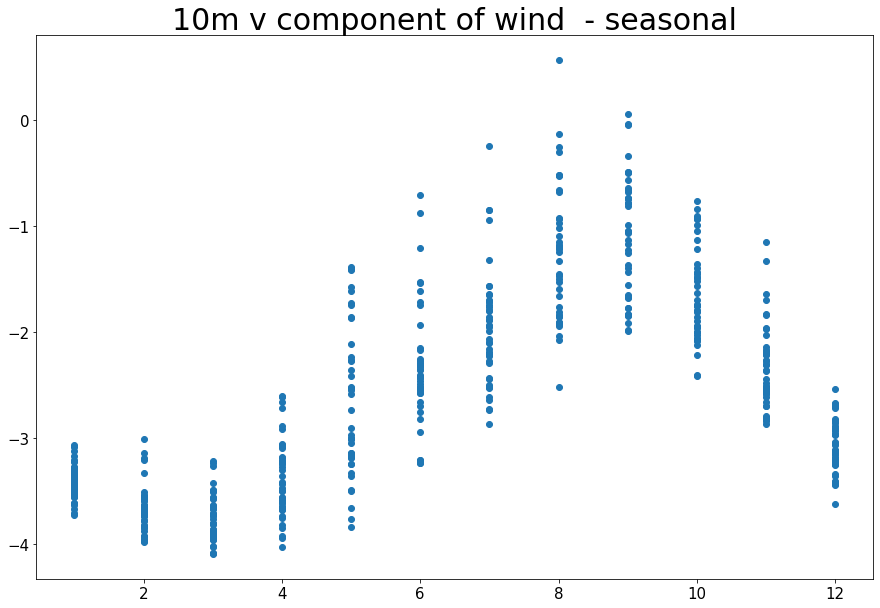

In [201]:
plt.scatter(m10_v_comp_of_wind.time.dt.month, m10_v_comp_of_wind.v10)
#plt.ylim(bottom=0)
plt.title('10m v component of wind  - seasonal', fontsize=30)

Text(0.5, 1.0, 'benjamin_feir_index  - seasonal')

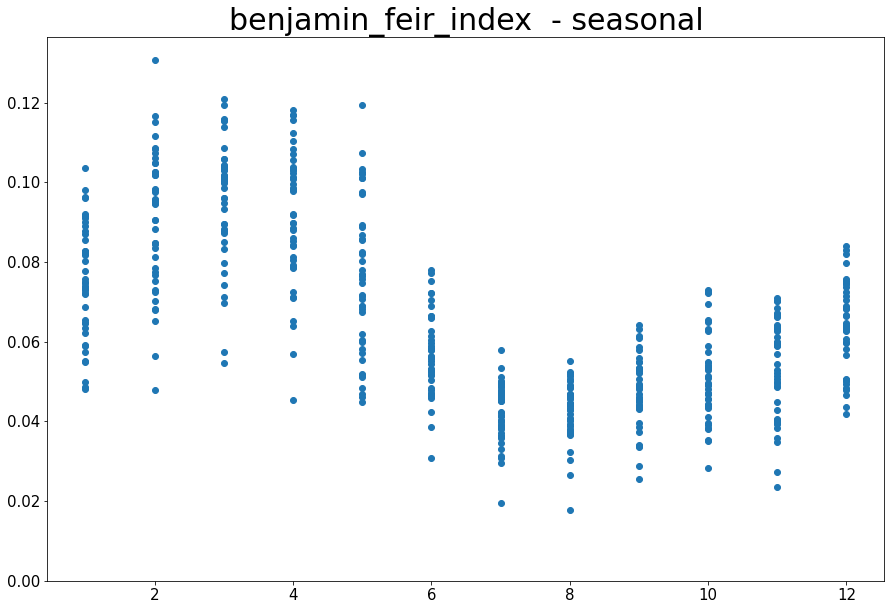

In [202]:
plt.scatter(benjamin_feir_index.time.dt.month, benjamin_feir_index.bfi)
plt.ylim(bottom=0)
plt.title('benjamin_feir_index  - seasonal', fontsize=30)

Text(0.5, 1.0, 'evaporation  - seasonal')

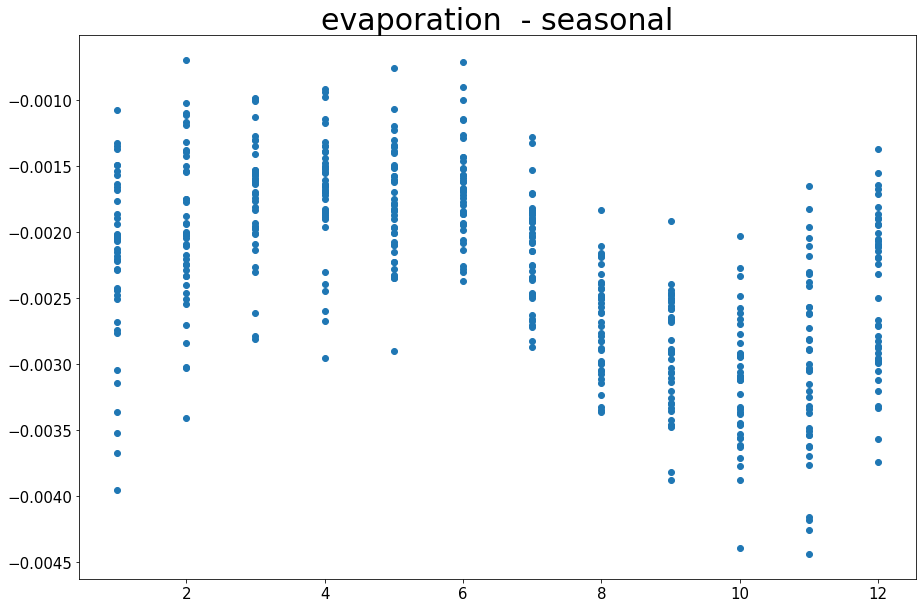

In [203]:
plt.scatter(evaporation.time.dt.month, evaporation.e)
#plt.ylim(bottom=0)
plt.title('evaporation  - seasonal', fontsize=30)

Text(0.5, 1.0, 'instantaneous_surface_sensible_heat_flux  - seasonal')

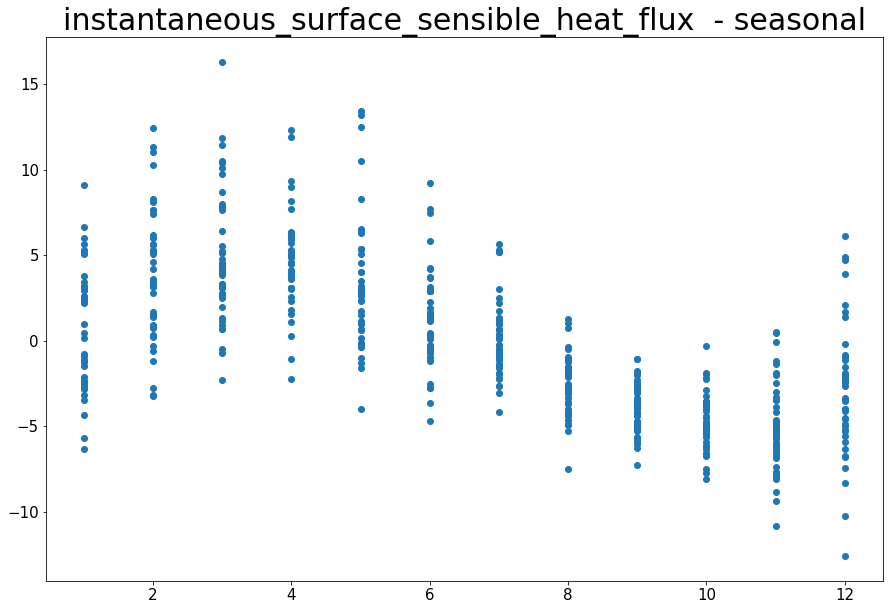

In [204]:
plt.scatter(instantaneous_surface_sensible_heat_flux.time.dt.month, instantaneous_surface_sensible_heat_flux.ishf)
#plt.ylim(bottom=0)
plt.title('instantaneous_surface_sensible_heat_flux  - seasonal', fontsize=30)

Text(0.5, 1.0, 'magnitude_of_turbulent_surface_stress  - seasonal')

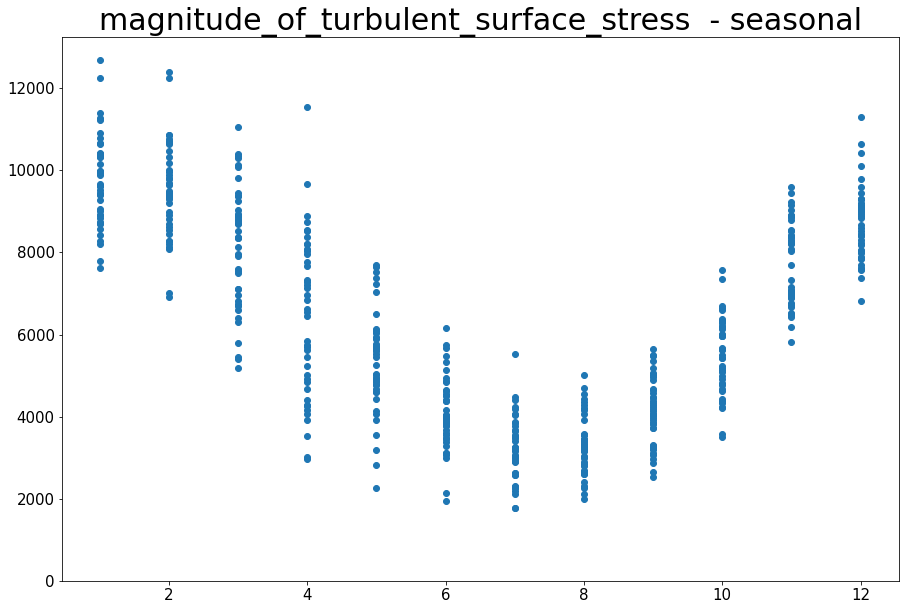

In [205]:
plt.scatter(magnitude_of_turbulent_surface_stress.time.dt.month, magnitude_of_turbulent_surface_stress.magss)
plt.ylim(bottom=0)
plt.title('magnitude_of_turbulent_surface_stress  - seasonal', fontsize=30)

Text(0.5, 1.0, 'normalized_energy_flux_into_ocean  - seasonal')

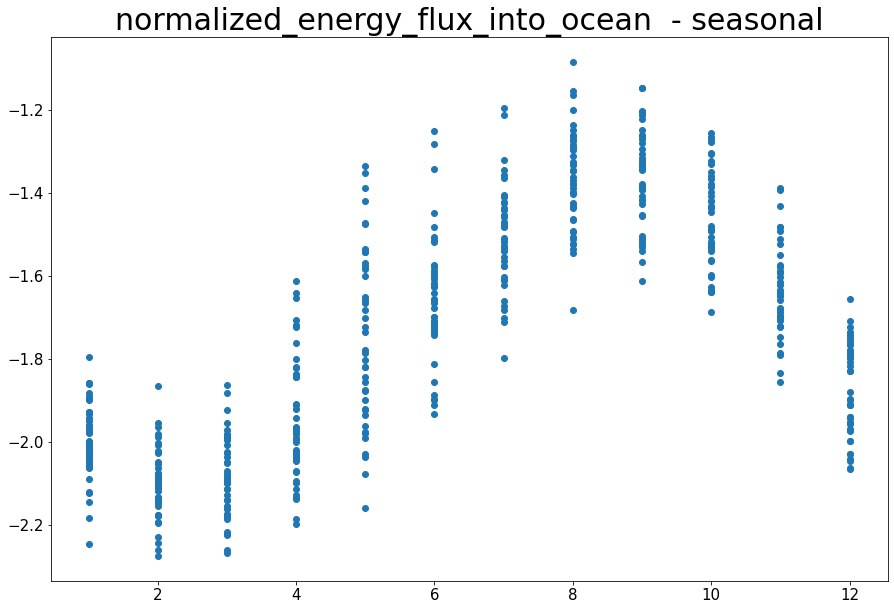

In [206]:
plt.scatter(normalized_energy_flux_into_ocean.time.dt.month, normalized_energy_flux_into_ocean.phioc)
#plt.ylim(bottom=0)
plt.title('normalized_energy_flux_into_ocean  - seasonal', fontsize=30)

Text(0.5, 1.0, 'sea surface temperature  - seasonal')

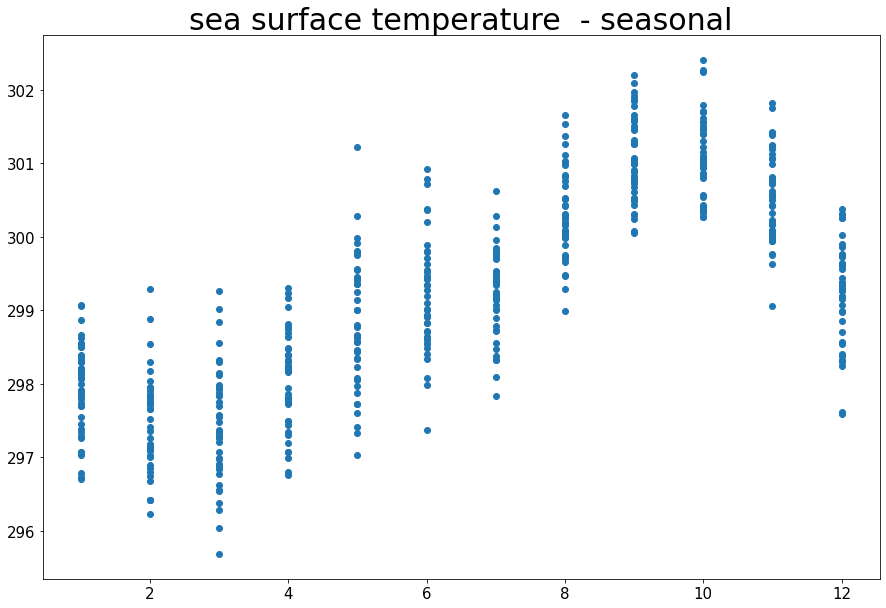

In [207]:
#sea_surface_temperature.data_vars
plt.scatter(sea_surface_temperature.time.dt.month, sea_surface_temperature.sst)
#plt.ylim(bottom=0)
plt.title('sea surface temperature  - seasonal', fontsize=30)

Text(0.5, 1.0, 'surface_latent_heat_flux  - seasonal')

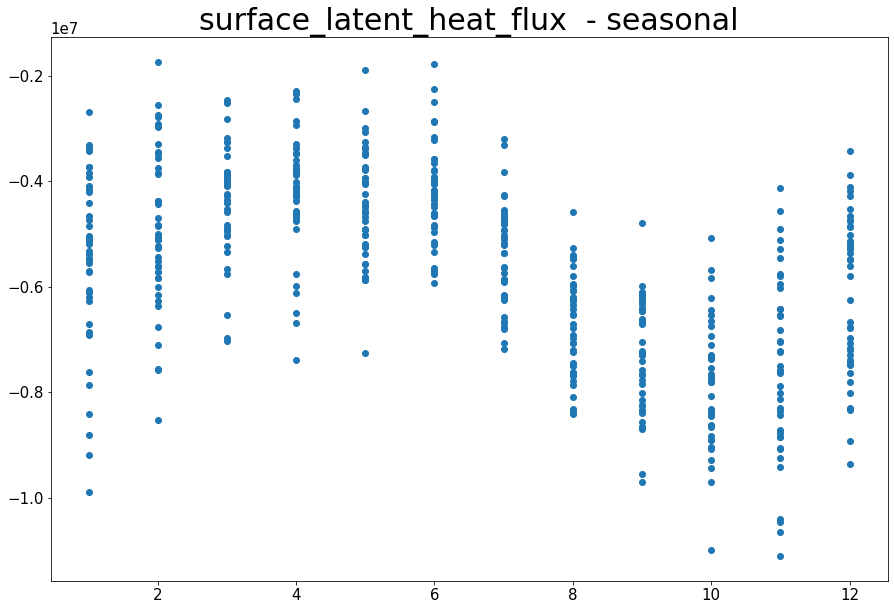

In [208]:
#surface_latent_heat_flux.data_vars
plt.scatter(surface_latent_heat_flux.time.dt.month, surface_latent_heat_flux.slhf)
#plt.ylim(bottom=0)
plt.title('surface_latent_heat_flux  - seasonal', fontsize=30)

Text(0.5, 1.0, 'u_component_stokes_drift  - seasonal')

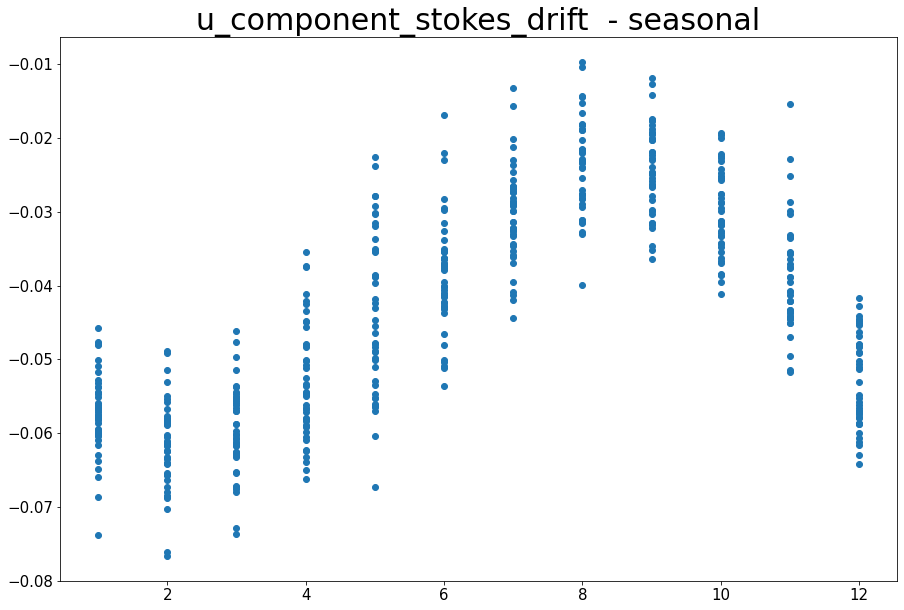

In [209]:
#u_component_stokes_drift.data_vars
plt.scatter(u_component_stokes_drift.time.dt.month, u_component_stokes_drift.ust)
#plt.ylim(bottom=0)
plt.title('u_component_stokes_drift  - seasonal', fontsize=30)

Text(0.5, 1.0, 'v_component_stokes_drift  - seasonal')

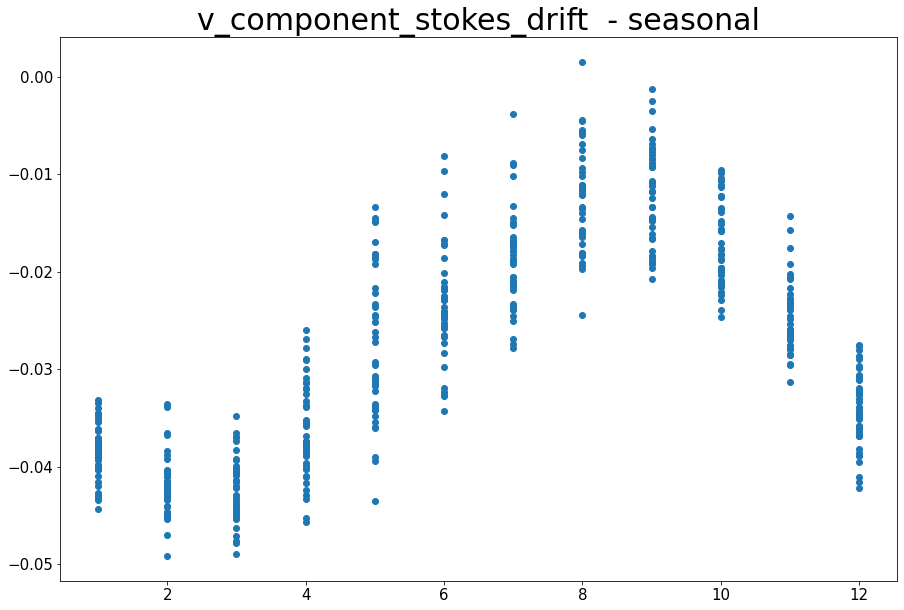

In [210]:
#v_component_stokes_drift.data_vars
plt.scatter(v_component_stokes_drift.time.dt.month, v_component_stokes_drift.vst)
#plt.ylim(bottom=0)
plt.title('v_component_stokes_drift  - seasonal', fontsize=30)

Text(0.5, 1.0, 'friction_velocity  - seasonal')

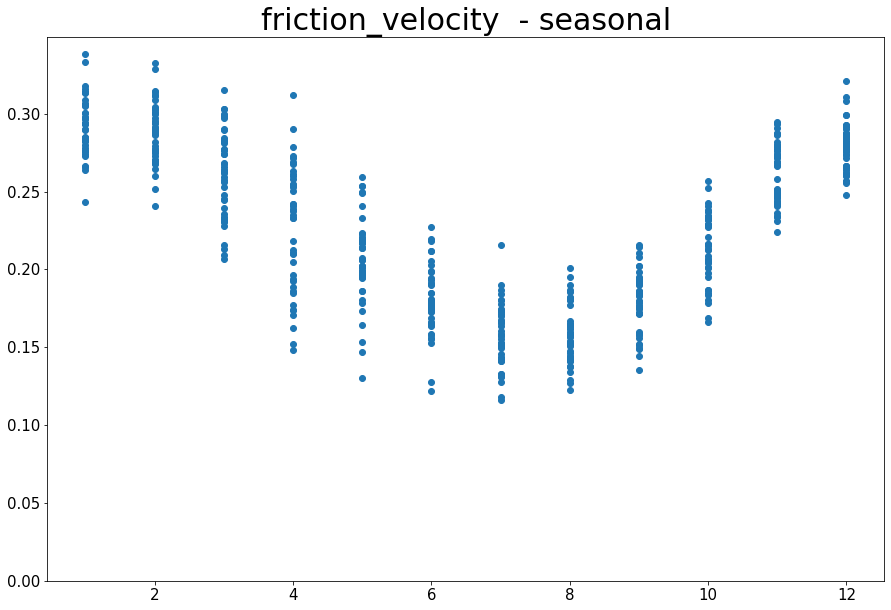

In [211]:
#friction_velocity.data_vars
plt.scatter(friction_velocity.time.dt.month, friction_velocity.zust)
plt.ylim(bottom=0)
plt.title('friction_velocity  - seasonal', fontsize=30)

Text(0.5, 1.0, 'large_scale_precipitation - seasonal')

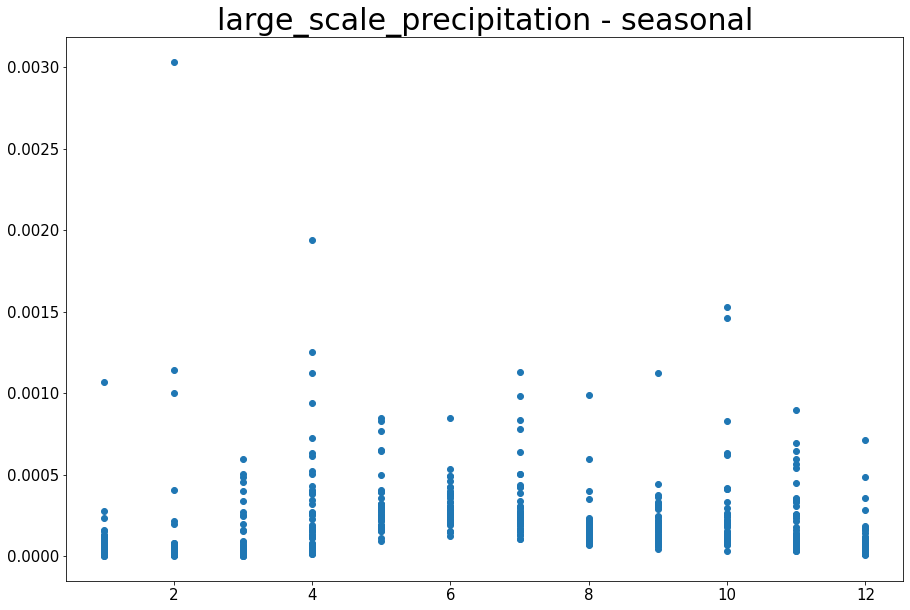

In [212]:
#large_scale_precipitation.data_vars
plt.scatter(large_scale_precipitation.time.dt.month, large_scale_precipitation.lsp)
#plt.ylim(bottom=0)
plt.title('large_scale_precipitation - seasonal', fontsize=30)

# GET In-Situ DATA

so what do I want to plot?

MLD vs Climate vars
21° Isocline vs Climate vars
Chlorophyll vs Climate vars

# SO FIRST:
1. get MLD
2. get 21° Isocline
3. get Chlorophyll

In [60]:
MLD2EuZ = pd.read_csv("MLD2EuZ_2.csv")

In [61]:
MLD2EuZ.Date = pd.to_datetime(MLD2EuZ.Date)

In [62]:
MLD2EuZ

,Unnamed: 0,CruiseID,Date,MLD2015,MLD2019,x0.1,x1,x10,X21degC,X22degC
0,1,93HG_001,1995-11-08,NaN,24.138,NaN,NaN,NaN,130.0,118.0
1,2,93HG_002,1995-12-13,NaN,18.103,NaN,NaN,NaN,114.0,94.0
2,3,93HG_003,1996-01-12,36.0,10.057,NaN,NaN,NaN,102.0,62.0
3,4,93HG_004,1996-02-13,28.0,8.046,NaN,NaN,NaN,94.0,66.0
4,5,93HG_005,1996-03-13,28.0,10.057,NaN,NaN,NaN,48.0,24.0
...,...,...,...,...,...,...,...,...,...,...
193,203,93HG_195,2012-09-10,13.0,4.970,NaN,NaN,NaN,115.0,108.0
194,204,93HG_196,2012-10-10,12.0,2.980,NaN,NaN,NaN,122.0,116.0
195,205,93HG_197,2012-11-08,22.0,13.920,NaN,NaN,NaN,120.0,109.0
196,206,93HG_198,2012-12-04,NaN,16.900,NaN,NaN,NaN,114.0,101.0


In [134]:
MLDdat = MLD2EuZ.to_xarray()

Text(0.5, 0, 'Month')

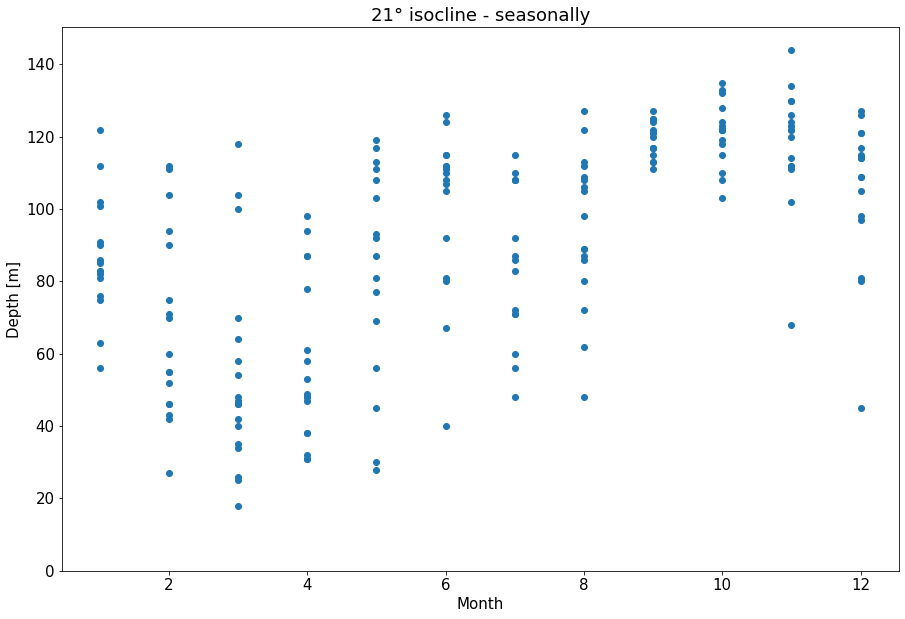

In [213]:
plt.scatter(MLDdat.Date.dt.month, MLDdat.X21degC)
plt.ylim(bottom=0)
plt.title("21° isocline - seasonally")
plt.ylabel("Depth [m]")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

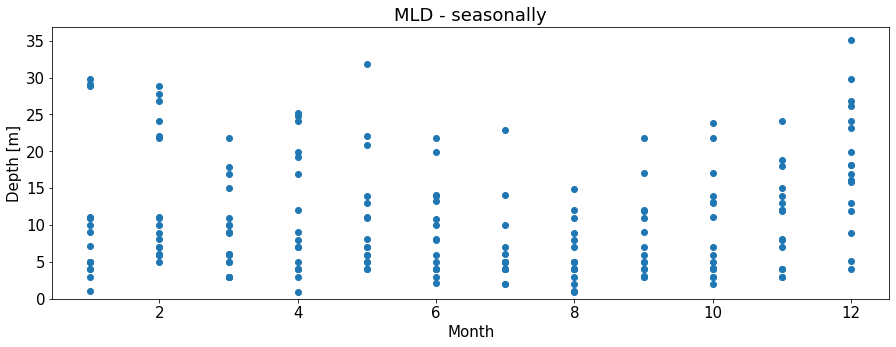

In [150]:
plt.scatter(MLDdat.Date.dt.month, MLDdat.MLD2019)
plt.ylim(bottom=0)
plt.title("MLD - seasonally")
plt.ylabel("Depth [m]")
plt.xlabel("Month")

In [ ]:
MLDdat.assign_coords(month=MLDdat.Date.dt.month)

In [66]:
#type(MLD2EuZ.to_xarray()),type(m10_wind_speed)
merged = xr.merge([MLD2EuZ.to_xarray(), m10_wind_speed])

In [71]:
merged.Date, merged.time

<xarray.DataArray 'time' (time: 498)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2020-04-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-06-01
    step        timedelta64[ns] 00:00:00
    surface     int64 0
    latitude    float64 10.57
    longitude   float64 -64.55
    valid_time  (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-06-01
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [159]:
MLDdat

<xarray.Dataset>
Dimensions:     (index: 198)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 191 192 193 194 195 196 197
Data variables:
    Unnamed: 0  (index) int64 1 2 3 4 5 6 7 8 ... 201 202 203 204 205 206 207
    CruiseID    (index) object '93HG_001' '93HG_002' ... '93HG_198' '93HG_199'
    Date        (index) datetime64[ns] 1995-11-08 1995-12-13 ... 2013-03-13
    MLD2015     (index) float64 nan nan 36.0 28.0 28.0 ... 12.0 22.0 nan nan
    MLD2019     (index) float64 24.14 18.1 10.06 8.046 ... 2.98 13.92 16.9 4.97
    x0.1        (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    x1          (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    x10         (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    X21degC     (index) float64 130.0 114.0 102.0 94.0 ... 120.0 114.0 46.0
    X22degC     (index) float64 118.0 94.0 62.0 66.0 ... 116.0 109.0 101.0 27.0
    time        (index) datetime64[ns] 1995-11-08 1995-12-13 ... 2013-03-13

In [196]:
#MLDdat.resample(Date='M')

In [195]:
#xr.merge([MLDdat, m10_wind_speed], compat='no_conflicts')

Text(0.5, 1.0, '21° Isocline vs 10m wind speed')

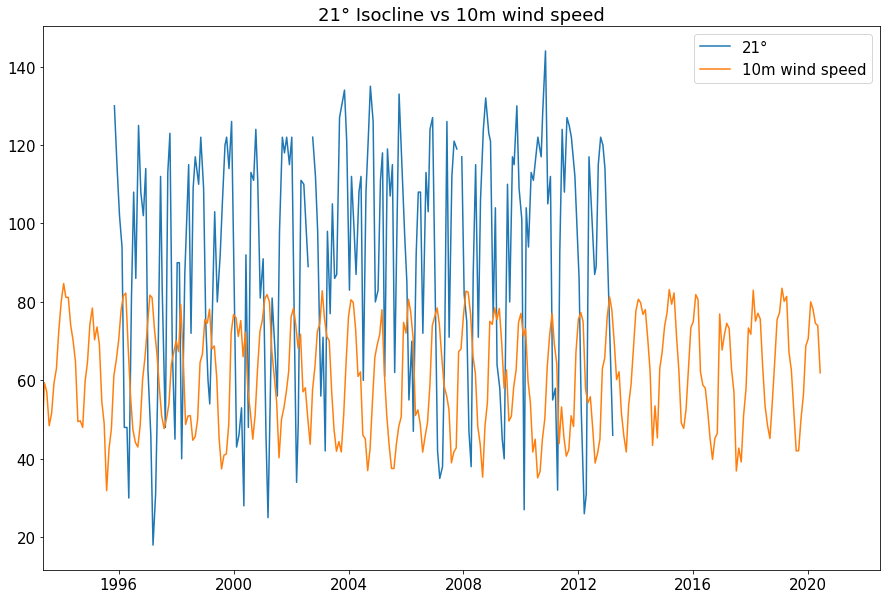

In [214]:
plt.plot(MLD2EuZ.Date, MLD2EuZ.X21degC, label='21°')

plt.plot(m10_wind_speed.time.values, m10_wind_speed.si10*10, label='10m wind speed')
plt.xlim(727693.65, 738333.35)
plt.legend()

plt.title("21° Isocline vs 10m wind speed")

In [ ]:
# Nutrient Gradient -> Entrainment Flux, nutrient input over time
# upwelling velocity from wind curl
# proxy for upwelling from 21° isotherm

In [170]:
INT_Chlorophyll = pd.read_csv("PINTDF_integratedChlorophyll.csv")

In [176]:
INT_Chlorophyll.Date = pd.to_datetime(INT_Chlorophyll.Date)

In [177]:
TotalChlaDat = INT_Chlorophyll[INT_Chlorophyll.spec=='Tchla']

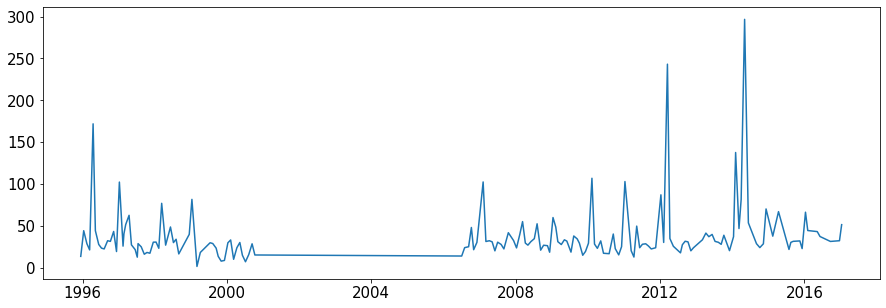

In [178]:
plt.plot(TotalChlaDat.Date, TotalChlaDat.val)

In [2]:
import xarray as xr
import pandas as pd
import numpy as np

In [3]:
phyto = xr.open_dataset('../VeryNEWESTCariacoData/phytoplankton_dtypes.netcdf')

In [4]:
phyto

<xarray.Dataset>
Dimensions:                  (unlimited: 96841)
Dimensions without coordinates: unlimited
Data variables:
    Cruise                   (unlimited) int64 ...
    Cruise_ID_2              (unlimited) object ...
    Leg                      (unlimited) int64 ...
    Cast                     (unlimited) int64 ...
    Day_local                (unlimited) int64 ...
    Month_local              (unlimited) int64 ...
    Year_local               (unlimited) int64 ...
    Latitude                 (unlimited) float64 ...
    Longitude                (unlimited) float64 ...
    Time_start_local         (unlimited) object ...
    Time_end_local           (unlimited) object ...
    Datetime_local           (unlimited) datetime64[ns] ...
    Datetime_UTC             (unlimited) datetime64[ns] ...
    SpeciesNameOriginal      (unlimited) object ...
    SpeciesNameCleaned       (unlimited) object ...
    ScientificName_accepted  (unlimited) object ...
    AphiaID                  (unlimited) int64 ...
    d_1m                     (unlimited) float64 ...
    d_7m                     (unlimited) float64 ...
    d_15m                    (unlimited) float64 ...
    d_25m                    (unlimited) float64 ...
    d_35m                    (unlimited) float64 ...
    d_55m                    (unlimited) float64 ...
    d_75m                    (unlimited) float64 ...
    d_100m                   (unlimited) float64 ...
    Total_sum                (unlimited) float64 ...